## 12-Nov-2023, [Chelsea vs MC](https://www.fotmob.com/matches/chelsea-vs-manchester-city/2d55kw#4193574)

### Read data from Dmytro

In [27]:
import pandas as pd
df = pd.read_csv('data/12112023/events_1729243.csv')
df['player_id'] = df['player_id'].astype('Int32')
df.head()

,league,season,game,id,game_id,period,minute,second,expanded_minute,type,...,goal_mouth_z,blocked_x,blocked_y,qualifiers,is_touch,is_shot,is_goal,card_type,related_event_id,related_player_id
0,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209451,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'TeamFormation', 'va...",False,NaN,NaN,NaN,NaN,NaN
1,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617209477,1729243,PreMatch,0,0.0,0,FormationSet,...,NaN,NaN,NaN,"[{'type': {'displayName': 'JerseyNumber', 'val...",False,NaN,NaN,NaN,NaN,NaN
2,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287459,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
3,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287467,1729243,FirstHalf,0,0.0,0,Start,...,NaN,NaN,NaN,[],False,NaN,NaN,NaN,NaN,NaN
4,ENG-Premier League,2324,2023-11-12 Chelsea-Manchester City,2617287487,1729243,FirstHalf,0,0.0,0,Pass,...,NaN,NaN,NaN,"[{'type': {'displayName': 'Zone', 'value': 56}...",True,NaN,NaN,NaN,NaN,NaN


In [38]:
# type of events available
df['type'].unique()

array(['FormationSet', 'Start', 'Pass', 'BallTouch', 'SavedShot', 'Save',
       'Aerial', 'Challenge', 'TakeOn', 'BallRecovery', 'BlockedPass',
       'Foul', 'Dispossessed', 'Tackle', 'Interception', 'CornerAwarded',
       'Claim', 'Clearance', 'KeeperPickup', 'Card', 'Goal',
       'PenaltyFaced', 'MissedShots', 'Error', 'End', 'SubstitutionOff',
       'SubstitutionOn', 'FormationChange', 'KeeperSweeper',
       'ShieldBallOpp', 'OffsideProvoked', 'OffsidePass', 'OffsideGiven'],
      dtype=object)

In [33]:
df_shots = df[df['type'].isin(['Goal', 'MissedShots'])]
len(df_shots)
# This is weird, there were ~ 17+15 shots.
# I think some of them are classified as "passes", and then we have to look at "col 24 - qualifiers"

14

In [34]:
# Events per player
df.groupby(['player_id', 'player'], dropna=False)['player_id'].count().sort_values(ascending=False)

player_id  player          
313171     Rúben Dias          108
303139     Rodri               107
402664     Josko Gvardiol       90
300426     Axel Disasi          88
69778      Kyle Walker          82
297390     Manuel Akanji        78
136741     Bernardo Silva       77
97692      Raheem Sterling      74
375621     Conor Gallagher      73
331254     Phil Foden           70
363496     Marc Cucurella       68
28550      Thiago Silva         67
395692     Cole Palmer          60
362151     Robert Sánchez       60
369430     Enzo Fernández       59
121774     Ederson              59
361330     Reece James          56
365409     Julián Álvarez       54
410175     Moisés Caicedo       51
388098     Jérémy Doku          39
113069     Jack Grealish        36
403850     Malo Gusto           34
426050     Nicolas Jackson      28
315227     Erling Haaland       27
93894      Mateo Kovacic        19
409376     Mykhailo Mudryk      10
393407     Armando Broja         6
404616     Lesley Ugochukwu

## Simple Visualization Examples

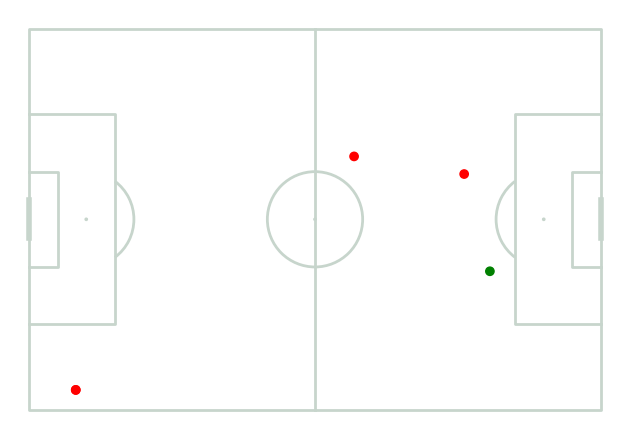

In [54]:
from mplsoccer.pitch import Pitch

# points that led to a goal at event #530
shot = 530
df_shot = df[shot-4:shot+1].copy()
df_shot['color'] = 'red'
df_shot.loc[shot, 'color'] = 'green'

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='white', 
              line_color='#c7d5cc')

fig, ax = pitch.draw()

_ = pitch.scatter(x=df_shot['x'].to_list(), 
                  y=df_shot['y'].to_list(),
                  color=df_shot['color'].to_list(),
                  ax=ax)

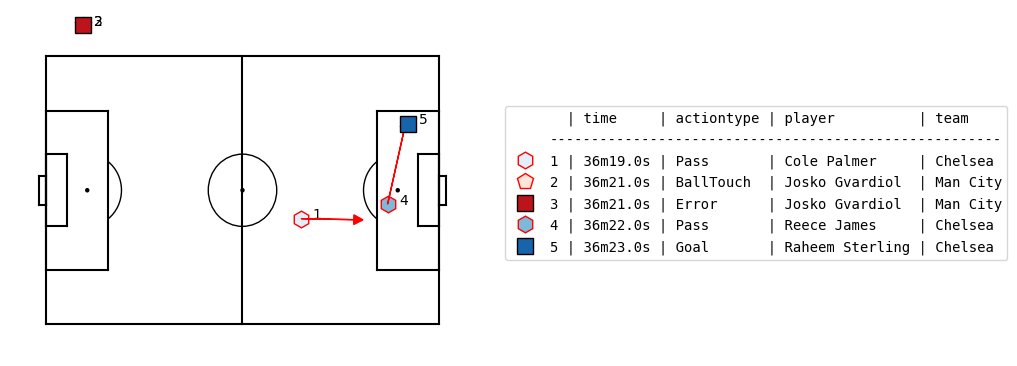

In [55]:
import matplotsoccer

a = df_shot

# Plot the actions
def nice_time(row):
    return f"{row.minute}m{row.second}s"

a["nice_time"] = a.apply(nice_time, axis=1)
labels = a[["nice_time", "type", "player", "team"]]

ax = matplotsoccer.actions(
    location=a[["x", "y", "end_x", "end_y"]],
    action_type=a.type,
    team= a.team,
    result= a.outcome_type == "Successful",
    label=labels,
    labeltitle=["time", "actiontype", "player", "team"],
    zoom=False,
    figsize=6
)

# Loading data from WhoScored (via soccerdata cache)

In [9]:
import soccerdata as sd
import os
from pathlib import Path

# https://www.whoscored.com/Matches/1729243/Live/England-Premier-League-2023-2024-Chelsea-Manchester-City

data_dir=Path(f"{os.getcwd()}/../data/soccerdata_cache")
ws = sd.WhoScored(leagues="ENG-Premier League", seasons="23-24", data_dir=data_dir)

/Users/ivn/Documents/projects/fa_ucu/Manchester-City/src/../data/soccerdata_cache


[12/27/23 23:41:50] INFO     Saving cached data to                                                    ]8;id=271522;file:///usr/local/lib/python3.11/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=674728;file:///usr/local/lib/python3.11/site-packages/soccerdata/_common.py#91\91]8;;\
                             /Users/ivn/Documents/projects/fa_ucu/Manchester-City/src/../data/soccerd              
                             ata_cache                                                                             

[12/27/23 23:41:51] INFO     patching driver executable /Users/ivn/Library/Application               ]8;id=750519;file:///usr/local/lib/python3.11/site-packages/undetected_chromedriver/patcher.py\patcher.py]8;;\:]8;id=3615;file:///usr/local/lib/python3.11/site-packages/undetected_chromedriver/patcher.py#346\346]8;;\
                             Support/undetected_chromedriver/undetected_chromedriver                               

In [11]:
# read it here once so we can force cache later
epl_schedule = ws.read_schedule(force_cache=True)

[12/27/23 23:45:50] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=183040;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=323263;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

In [12]:
GAME_ID=1729243
events_raw = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="raw")
events_spadl = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="spadl")
events_atomic_spadl = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="atomic-spadl")
events = ws.read_events(match_id=GAME_ID, force_cache=True, output_fmt="events")

[12/27/23 23:46:13] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=343565;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=402557;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=53391;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=997124;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

[12/27/23 23:46:25] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=959528;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=774282;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=143358;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=348985;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

[12/27/23 23:46:26] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=271531;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=739878;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=251321;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=601820;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

                    INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=248434;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=462894;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=234289;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=910363;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#693\693]8;;\

In [13]:
missing_players = ws.read_missing_players(match_id=1729243, force_cache=True)

[12/27/23 23:48:07] INFO     Retrieving game schedule of ENG-Premier League - 2324 from the cache  ]8;id=985882;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=429509;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#437\437]8;;\

                    INFO     [1/1] Retrieving game with id=1729243                                 ]8;id=841036;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py\whoscored.py]8;;\:]8;id=895594;file:///usr/local/lib/python3.11/site-packages/soccerdata/whoscored.py#538\538]8;;\

In [15]:
import socceraction

# use
# socceraction.spadl.config.actiontypes
# socceraction.spadl.config.results
# socceraction.spadl.config.bodyparts
# to interpret values
# e.g.
print(socceraction.spadl.config.actiontypes[0])
events_spadl[:3]

pass


,game_id,original_event_id,period_id,time_seconds,team_id,player_id,start_x,end_x,start_y,end_y,type_id,result_id,bodypart_id,action_id,player,team
0,1729243,2617287487,1,0.0,15,426050.0,52.920,47.145,33.524,30.260,0,1,0,0,Nicolas Jackson,Chelsea
1,1729243,2617287575,1,1.0,15,369430.0,49.875,63.840,29.920,2.176,0,1,0,1,Enzo Fernández,Chelsea
2,1729243,NaN,1,3.0,15,361330.0,63.840,45.780,2.176,7.276,21,1,0,2,Reece James,Chelsea


In [14]:
missing_players

game_id  \
league             season game                               team            player                        
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja       1729243   
                                                                             Ben Chilwell        1729243   
                                                                             Carney Chukwuemeka  1729243   
                                                                             Christopher Nkunku  1729243   
                                                                             RomÃ©o Lavia        1729243   
                                                                             Trevoh Chalobah     1729243   
                                                                             Wesley Fofana       1729243   
                                                             Manchester City John Stones         1729243   
                                                                             Kevin De Bruyne     1729243   
                                                                             Manuel Akanji       1729243   
                                                                             Sergio GÃ³mez       1729243   

                                                                                                 player_id  \
league             season game                               team            player                          
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja          393407   
                                                                             Ben Chilwell           299272   
                                                                             Carney Chukwuemeka     410639   
                                                                             Christopher Nkunku     300945   
                                                                             RomÃ©o Lavia           425319   
                                                                             Trevoh Chalobah        353292   
                                                                             Wesley Fofana          373946   
                                                             Manchester City John Stones            101374   
                                                                             Kevin De Bruyne         73084   
                                                                             Manuel Akanji          297390   
                                                                             Sergio GÃ³mez          355110   

                                                                                                           reason  \
league             season game                               team            player                                 
ENG-Premier League 2324   2023-11-12 Chelsea-Manchester City Chelsea         Armando Broja       injured doubtful   
                                                                             Ben Chilwell                 injured   
                                                                             Carney Chukwuemeka           injured   
                                                                             Christopher Nkunku           injured   
                                                                             RomÃ©o Lavia                 injured   
                                                                             Trevoh Chalobah              injured   
                                                                             Wesley Fofana                injured   
                                                             Manchester City John Stones                  injured   
                                                                             Kevin De Bruyn